In [2]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [4]:
from pandas_datareader import DataReader

In [5]:
from datetime import datetime

In [6]:
from __future__ import division

Congrats on finishing the Stock Market Data Analysis project! Here are some additional quesitons and excercises for you to do:

1.) Estimate the values at risk using both methods we learned in this project for a stock not related to technology.

2.) Build a practice portfolio and see how well you can predict you risk values with real stock information!

3.) Look further into correlatino of two stocks and see if that gives you any insight into future possible stock prices.

In [9]:
food_list = ['WEAT','SOYB','CORN','CANE']

In [8]:
end = datetime.now()

start = datetime(end.year-1, end.month, end.day)

In [10]:
for stock in food_list:
    globals()[stock] = DataReader(stock,data_source='yahoo',start=start,end=end)

In [11]:
WEAT.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-09-28,5.50,5.38,5.42,5.49,125100,5.49
2020-09-29,5.51,5.45,5.49,5.49,139800,5.49
2020-09-30,5.79,5.52,5.52,5.71,327700,5.71
2020-10-01,5.72,5.64,5.72,5.66,193900,5.66
2020-10-02,5.69,5.59,5.59,5.68,103700,5.68


In [12]:
# Moving Average
ma_day = [10,20,50]

for ma in ma_day:
    column_name = "MA for %s days" %(str(ma))
    WEAT[column_name] = WEAT['Adj Close'].rolling(ma).mean()

<AxesSubplot:xlabel='Date'>

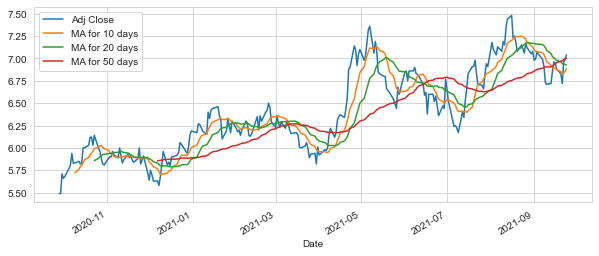

In [14]:
WEAT[['Adj Close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(subplots=False,figsize=(10,4))

In [15]:
closing_df = DataReader(food_list,'yahoo',start,end)['Adj Close']

In [16]:
closing_df.head()

Symbols,WEAT,SOYB,CORN,CANE
Date,,,,
2020-09-28,5.49,15.45,12.77,5.91
2020-09-29,5.49,15.42,12.72,6.06
2020-09-30,5.71,15.84,13.11,6.09
2020-10-01,5.66,15.90,13.24,6.12
2020-10-02,5.68,15.83,13.13,6.11


In [17]:
food_rets = closing_df.pct_change()

In [18]:
food_rets.head()

Symbols,WEAT,SOYB,CORN,CANE
Date,,,,
2020-09-28,NaN,NaN,NaN,NaN
2020-09-29,0.000000,-0.001942,-0.003915,0.025381
2020-09-30,0.040073,0.027237,0.030660,0.004951
2020-10-01,-0.008757,0.003788,0.009916,0.004926
2020-10-02,0.003534,-0.004402,-0.008308,-0.001634


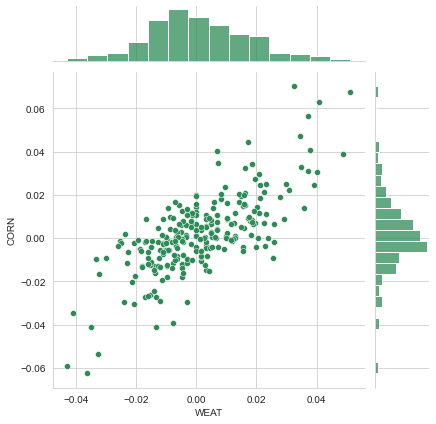

In [19]:
sns.jointplot(x='WEAT',y='CORN',data=food_rets,kind='scatter',color='seagreen')

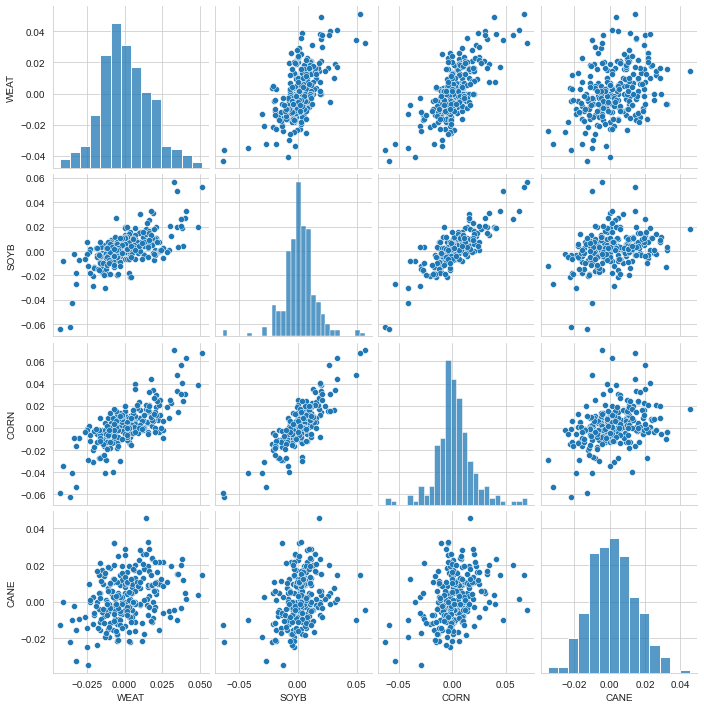

In [20]:
sns.pairplot(food_rets.dropna())

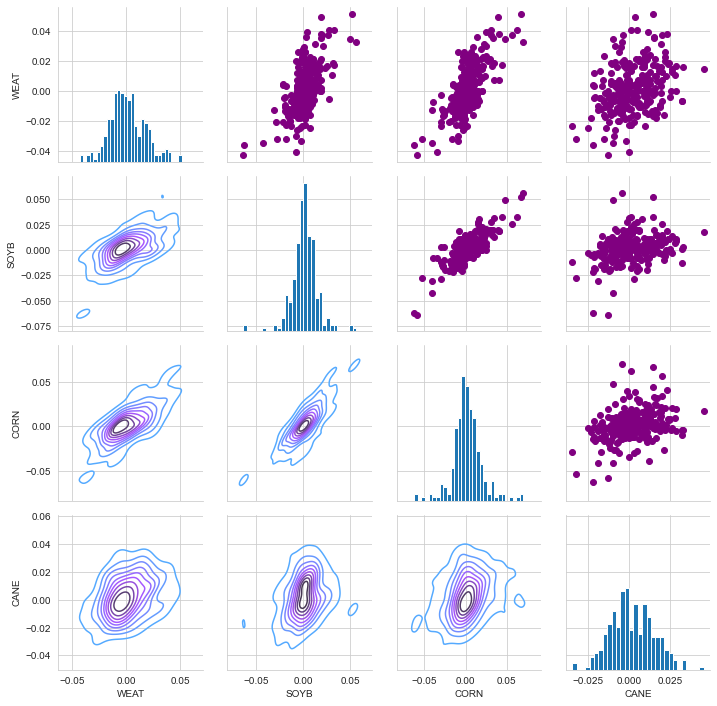

In [21]:
returns_fig = sns.PairGrid(food_rets.dropna())

returns_fig.map_upper(plt.scatter,color='purple')

returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

returns_fig.map_diag(plt.hist,bins=30)

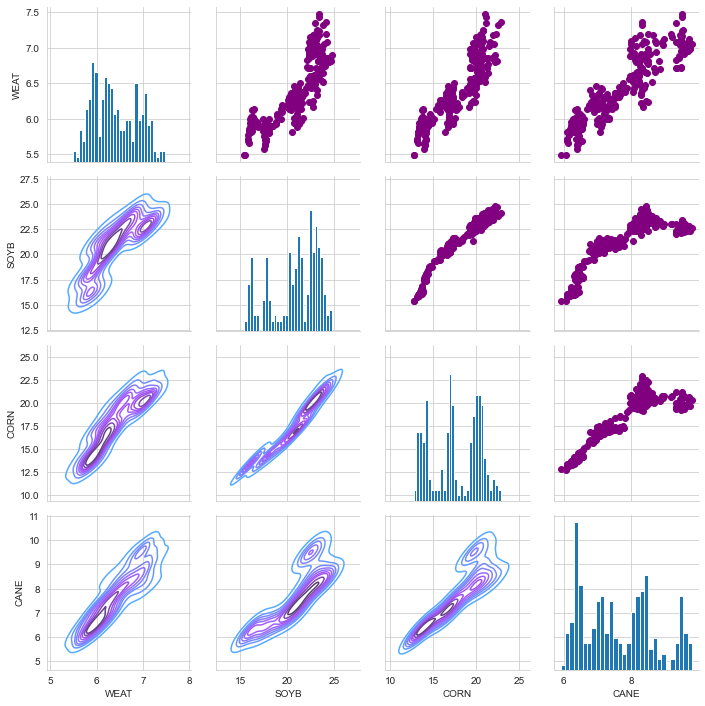

In [22]:
returns_fig = sns.PairGrid(closing_df)

returns_fig.map_upper(plt.scatter,color='purple')

returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

returns_fig.map_diag(plt.hist,bins=30)

In [23]:
# 1. Risk Analysis
rets = food_rets.dropna()

In [ ]:
area = np.pi*20

plt.scatter(rets.mean(),rets.std(),s = area)

plt.ylim([0.01,0.025])
plt.xlim([-0.003,0.004])

plt.xlabel('Expected Return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label,
        xy= (x, y), xytext = (50, 50),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3,rad=-0.3')
    )

In [ ]:
# Predict future stock
days = 365

dt = 1/days

mu = rets.mean()['WEAT']

sigma = rets.std()['WEAT']

In [26]:
def stock_monte_carlo(start_price,days,mu,sigma):

    price = np.zeros(days)
    price[0] = start_price

    shock = np.zeros(days)
    drift = np.zeros(days)

    for x in range(1, days):

        shock[x] = np.random.normal(loc=mu*dt, scale=sigma*np.sqrt(dt))

        drift[x] = mu * dt

        price[x] = price[x-1] + (price[x-1] * (drift[x] + shock[x]))
    
    return price

In [28]:
WEAT.head()

,High,Low,Open,Close,Volume,Adj Close,MA for 10 days,MA for 20 days,MA for 50 days
Date,,,,,,,,,
2020-09-28,5.50,5.38,5.42,5.49,125100,5.49,NaN,NaN,NaN
2020-09-29,5.51,5.45,5.49,5.49,139800,5.49,NaN,NaN,NaN
2020-09-30,5.79,5.52,5.52,5.71,327700,5.71,NaN,NaN,NaN
2020-10-01,5.72,5.64,5.72,5.66,193900,5.66,NaN,NaN,NaN
2020-10-02,5.69,5.59,5.59,5.68,103700,5.68,NaN,NaN,NaN


In [29]:
start_price = 5.42

In [30]:
runs = 10000

simulations = np.zeros(runs)

for run in range(runs):
    simulations[run] = stock_monte_carlo(start_price, days, mu, sigma)[days-1]

Text(0.5, 1.0, 'Final price distribution for Wheat Stock after 365 days')

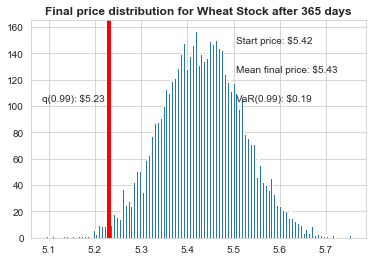

In [31]:
q = np.percentile(simulations, 1)

plt.hist(simulations, bins=200)

# Starting Price
plt.figtext(0.6, 0.8, s='Start price: $%.2f' %start_price)
# Mean ending price
plt.figtext(0.6, 0.7, 'Mean final price: $%.2f' % simulations.mean())

# Variance of the price (within 99% confidence interval)
plt.figtext(0.6, 0.6, 'VaR(0.99): $%.2f' % (start_price - q,))

# Display 1% quantile
plt.figtext(0.15, 0.6, 'q(0.99): $%.2f' % q)

# Plot a line at the 1% quantile result
plt.axvline(x=q, linewidth=4, color='r')

# Title
plt.title(u'Final price distribution for Wheat Stock after %s days' % days, weight='bold')